## Problem Statement
The classification of social media ads is all about analyzing the ads for classifying whether your target audience will buy the product or not.Classifying social media ads means analyzing your social media ads for finding the most profitable customers for your product who are more likely to buy the product. Sometimes the product you are offering is not suitable for all people when it comes to age and income. For example, a person between the ages of 20 and 25 may like to spend more on smartphone covers than a person between the ages of 40 and 45.

Likewise, a high-income person can afford to spend more on luxury goods than a low-income person. So this is how a business can determine whether a person will buy their product or not by classifying their social media ads.

## Data
The dataset I am using for the task of Social Media Ads Classification is downloaded from Kaggle. It contains data about a product’s social media advertising campaign.
## data features
It contains features like:

* the age of the target audience
* the estimated salary of the target audience
* and whether the target audience has purchased the product or not

## Importing necessary libraries

In [1]:

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

## Loading data

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/social.csv")
print(data.head())

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


Now let’s take a look at some of the insights from the data to see if we need to make any changes to the dataset:

In [5]:
print(data.describe())
print(data.isnull().sum())

              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


Now let’s explore some of the important patterns in the dataset. The first thing I want to explore is the ages of the people who responded to the social media ads and bought the product:

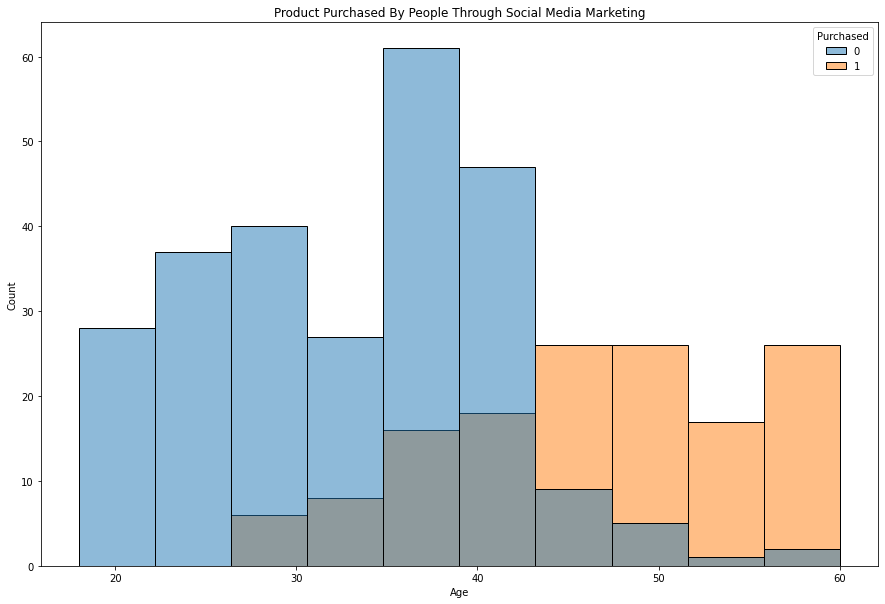

In [6]:
plt.figure(figsize=(15, 10))
plt.title("Product Purchased By People Through Social Media Marketing")
sns.histplot(x="Age", hue="Purchased", data=data)
plt.show()

The visualization above shows that people over 45 among the target audience are more interested in purchasing the product. Now let’s take a look at the income group of people who responded to social media ads and purchased the product:

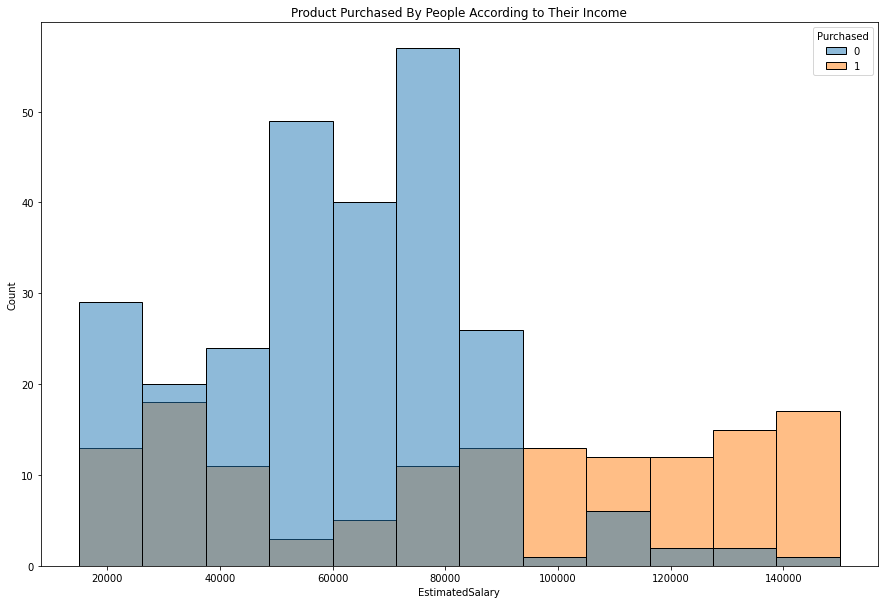

In [8]:
plt.figure(figsize=(15, 10))
plt.title("Product Purchased By People According to Their Income")
sns.histplot(x="EstimatedSalary", hue="Purchased", data=data)
plt.show()

The visualization above shows that people with a monthly income of over 90,000 among the target audience are more interested in purchasing the product.

## Training a Social Media Ads Classification Model

Now let’s train a model to classify social media ads. First I’ll set the “Purchased” column in the dataset as the target variable and the other two columns as the features we need to train a model:

In [9]:
x = np.array(data[["Age", "EstimatedSalary"]])
y = np.array(data[["Purchased"]])

Now let’s split the data and train a social media ads classification model using the decision tree classifier:

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                test_size=0.30, 
                                                random_state=42)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

let’s have a look at the classification report of the model:

In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        73
           1       0.83      0.83      0.83        47

    accuracy                           0.87       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.87      0.87      0.87       120



## Hyperparameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [5, 10, 15]}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        73
           1       0.90      0.96      0.93        47

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



we can see our accuraccy has improved from 0.87 to 0.94
## Conclusion
So this is how you can analyze and classify social media ads about the marketing campaign of a product. Classifying social media ads means analyzing your social media ads for finding the most profitable customers for your product who are more likely to buy the product